In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
df_train = pd.read_csv('dataset/train.csv')

# Data Exploration

In [49]:
# Randomly select a row
random_index = np.random.randint(0, len(df_train))
random_row = df_train.iloc[random_index, :]

# Extract the label and pixel
label = random_row['label']
pixels = random_row.drop('label')

# Reshape pixel values to a 28x28 matrix
image = pixels.values.reshape(28, 28)

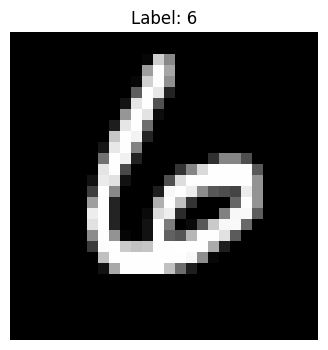

In [50]:
# Display the image with its label
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title('Label: %s' % label)
plt.axis('off')
plt.show()

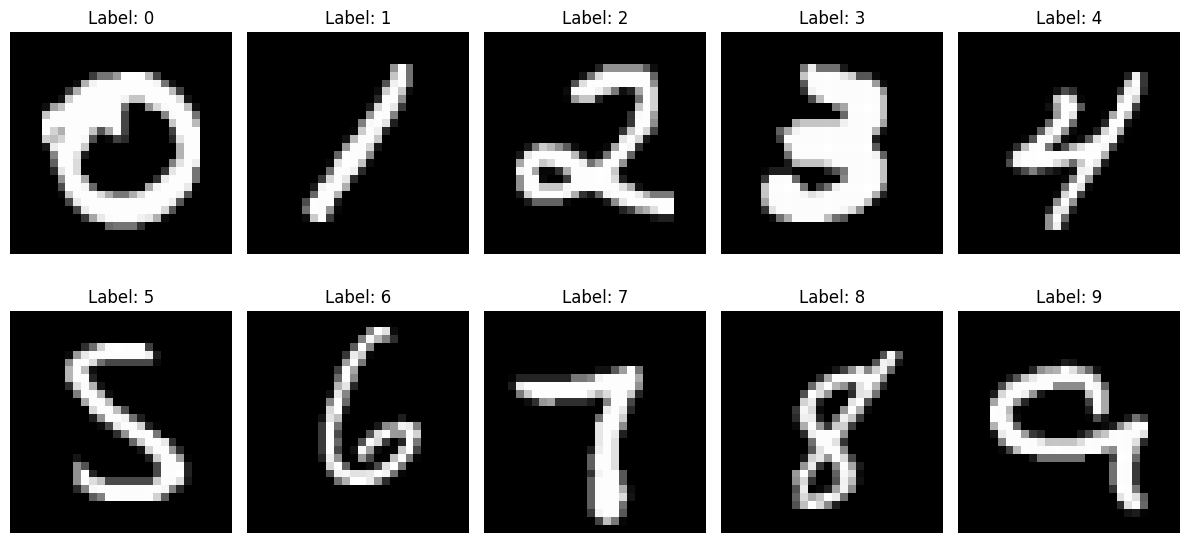

In [51]:
label_images = {}

# Select a random image for each label (0 to 9)
for label in range(10):
  # Filter the DataFrame for the current label
  label_df = df_train[df_train['label'] == label]

  # Randomly select an image for the current label
  random_index = np.random.randint(0, len(label_df))
  random_row = label_df.iloc[random_index, :]

  # Extract the pixel values and reshape into a 28x28 image
  pixels = random_row.drop('label')
  image = pixels.values.reshape(28, 28)

  # Store the image in the dictionary
  label_images[label] = image

# Plot all the images in a grid
plt.figure(figsize=(12, 6))
for label, image in label_images.items():
  plt.subplot(2, 5, label + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {label}')
  plt.axis('off')

plt.tight_layout()
plt.show()

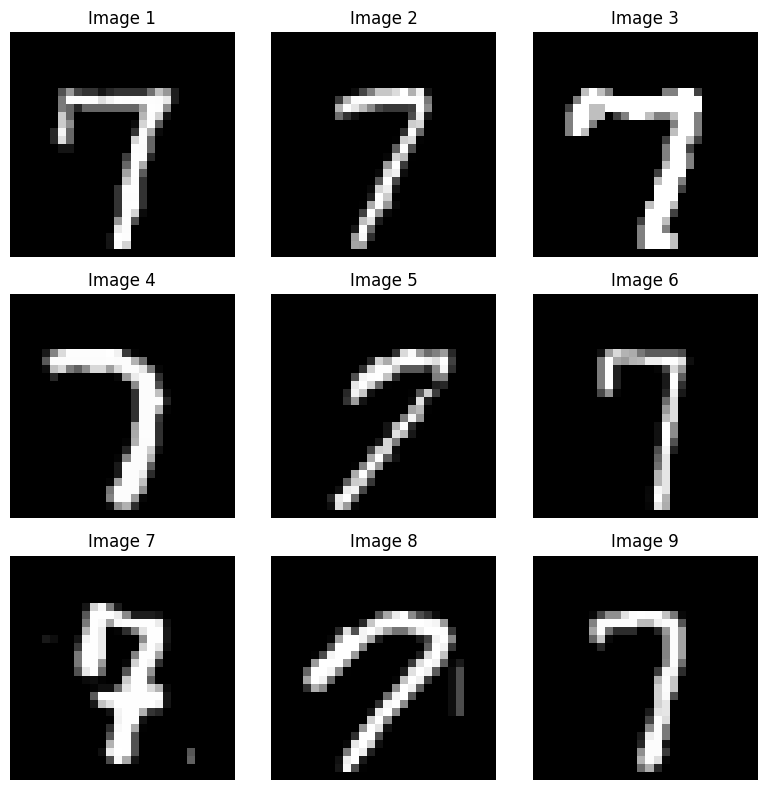

In [52]:
# Filter the DataFrame for label 7 and select the first nine images
label_7_df = df_train[df_train['label'] == 7].head(9)

# Create a list to store the images
images = []

# Extract and reshape the pixel values for each image
for index, row in label_7_df.iterrows():
  pixels = row.drop('label')
  image = pixels.values.reshape(28, 28)
  images.append(image)

# Plot the first nine images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i], cmap='gray')
  plt.title(f'Image {i + 1}')
  plt.axis('off')

plt.tight_layout()
plt.show()

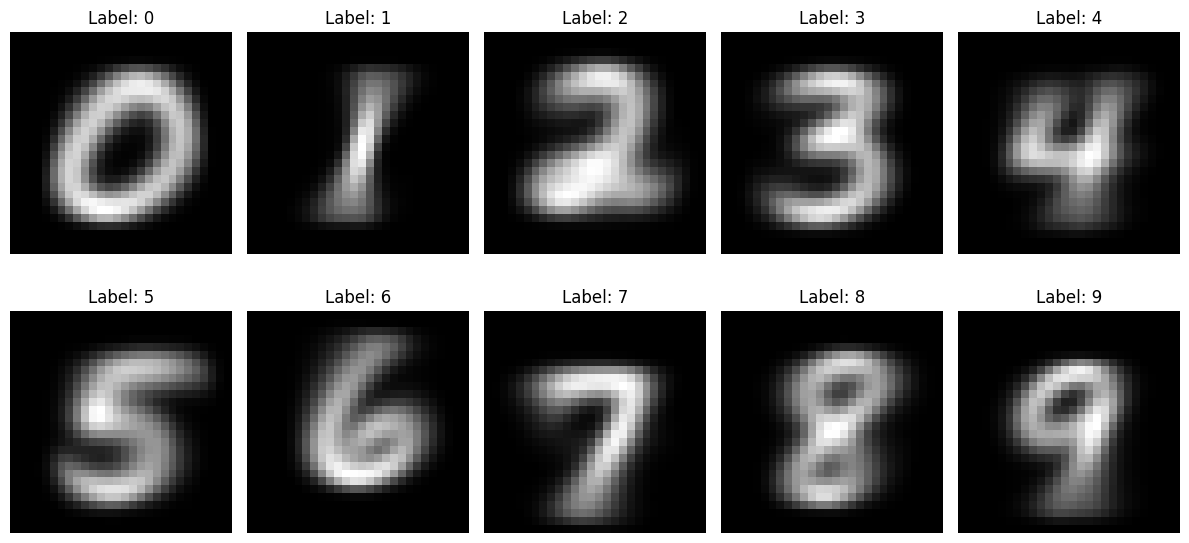

In [53]:
label_average_images = {}

# Calculate the average image for each label
for label in range(10):
  # Filter the DataFrame for the current label
  label_df = df_train[df_train['label'] == label]

  # Calculate the mean pixel values for the current label
  mean_pixels = label_df.drop('label', axis=1).mean().values

  # Reshape the mean pixel values into a 28x28 image
  mean_image = mean_pixels.reshape(28, 28)

  # Store the average image in the dictionary
  label_average_images[label] = mean_image

# Plot all the average images in a grid
plt.figure(figsize=(12, 6))
for label, image in label_average_images.items():
  plt.subplot(2, 5, label + 1)
  plt.imshow(image, cmap='gray')
  plt.title(f'Label: {label}')
  plt.axis('off')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Step 1: Load the datasets
train_data = pd.read_csv('dataset/train.csv')

# Split the training dataset into features (X) and labels (y)
X = train_data.drop(columns=['label'])
y = train_data['label']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Step 2: Model Selection (Example: RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

In [57]:
# Step 3: Model Training
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Step 4: Model Evaluation on Validation Set
y_valid_pred = model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
report_valid = classification_report(y_valid, y_valid_pred)

print(f'Validation Set - Accuracy: {accuracy_valid}')
print('Validation Set - Classification Report:\n', report_valid)

Validation Set - Accuracy: 0.9628571428571429
Validation Set - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400


In [59]:
# Step 5: Hyperparameter Tuning (Example: Grid Search)
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [60]:
# Step 6: Final Model Selection
y_valid_pred_best = best_model.predict(X_valid)
accuracy_valid_best = accuracy_score(y_valid, y_valid_pred_best)
report_valid_best = classification_report(y_valid, y_valid_pred_best)

print(f'Best Model - Validation Set Accuracy: {accuracy_valid_best}')
print('Best Model - Validation Set Classification Report:\n', report_valid_best)

Best Model - Validation Set Accuracy: 0.9635714285714285
Best Model - Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.96       839
           5       0.97      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.96      0.95      0.96       835
           9       0.94      0.95      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400
